In [1]:
# importing libraries
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) # adjusting the configuration of the plots we will create


In [2]:
#read csv data
df=pd.read_csv("archive/movies.csv")

In [3]:
# pd.set_option('display.max_rows',None)

In [4]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


<h3>Data Cleaning</h3>

In [5]:
#analyzing missing values in data
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [6]:
df = df.dropna(how='any',axis=0)

In [7]:
#analyzing missing values in data
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.0%
genre-0.0%
year-0.0%
released-0.0%
score-0.0%
votes-0.0%
director-0.0%
writer-0.0%
star-0.0%
country-0.0%
budget-0.0%
gross-0.0%
company-0.0%
runtime-0.0%


In [8]:
# Analyzing the data types of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Changing the data type of columns
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [10]:
# correcting the released year column
df['year_corrected']=df['released'].str.extract(pat='([0-9]{4})').astype(int)
df['year_corrected']

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7648    2020
7649    2020
7650    2020
7651    2020
7652    2020
Name: year_corrected, Length: 5421, dtype: int32

In [11]:
# dropping the year column
df = df.drop('year', axis=1)

<h3>Finding correlations in data</h3>

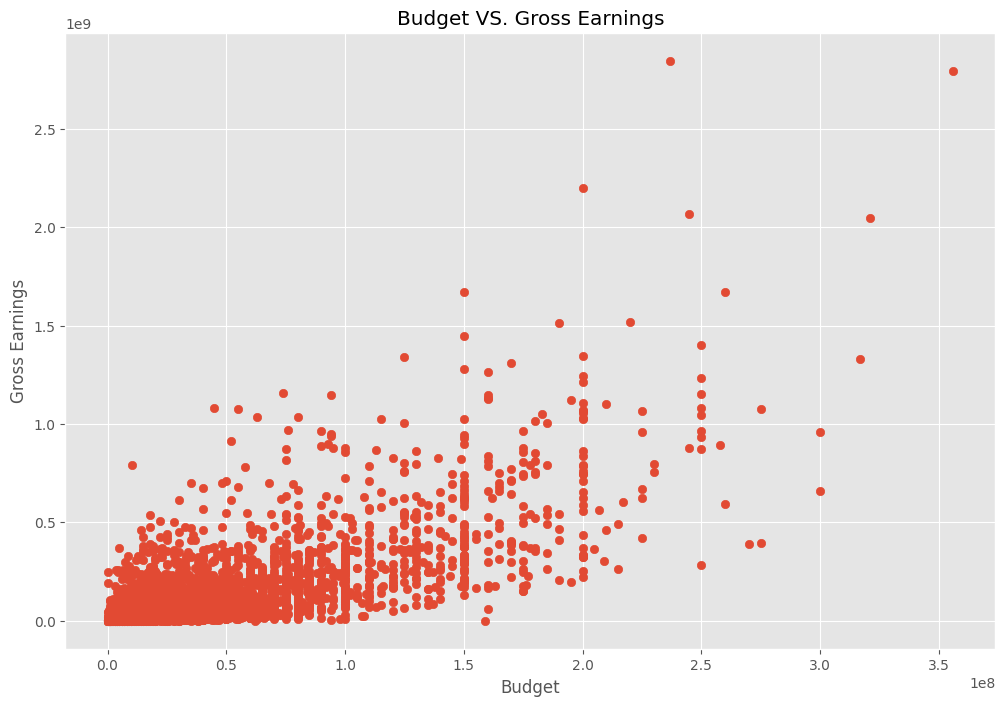

In [12]:
# Scatter Plot
plt.scatter(x=df['budget'],y=df['gross'])
plt.title("Budget VS. Gross Earnings")
plt.xlabel("Budget")
plt.ylabel("Gross Earnings")
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

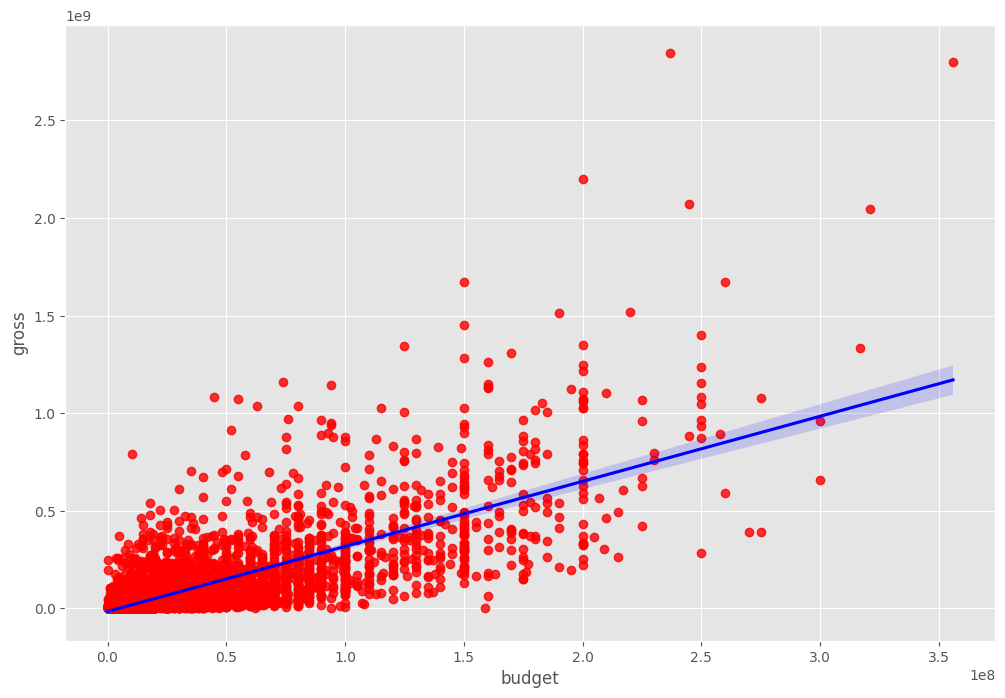

In [13]:
# Regplot
sns.regplot(x=df['budget'],y=df['gross'], scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [14]:
df.corr(numeric_only = True, method="pearson")

,score,votes,budget,gross,runtime,year_corrected
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_corrected,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


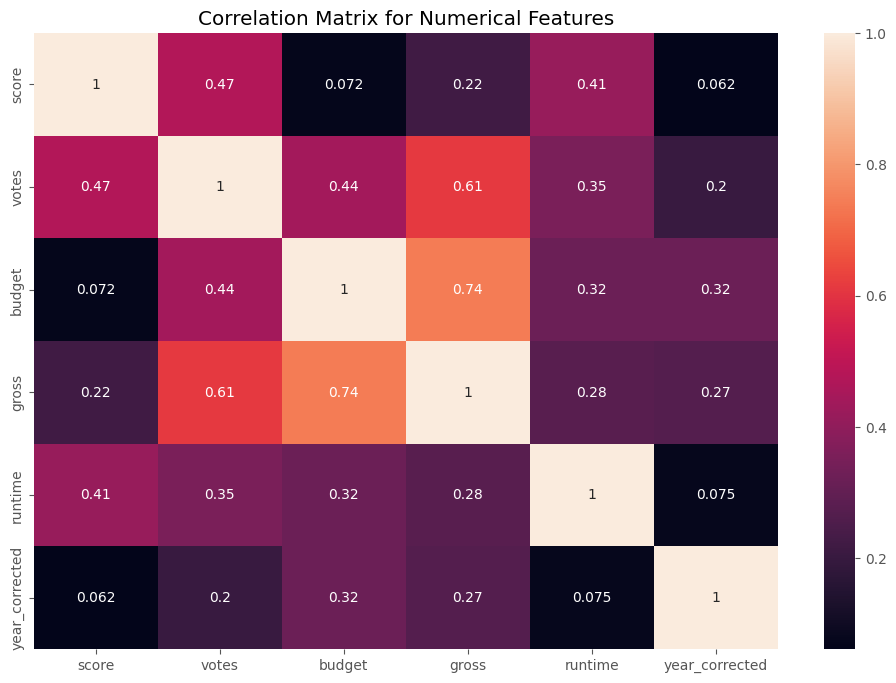

In [15]:
corr_matrix=df.corr(numeric_only = True, method="pearson")
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix for Numerical Features")

plt.show()

In [17]:
df_numerized=df
for col in df_numerized.columns:
    if (df_numerized[col].dtype=='object'):
        df_numerized[col]=df_numerized[col].astype('category')
        df_numerized[col]=df_numerized[col].cat.codes
df_numerized

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_corrected
0,4692,6,6,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0,2020
7649,3556,4,0,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0,2020
7650,1153,4,1,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0,2020
7651,3978,4,1,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0,2020


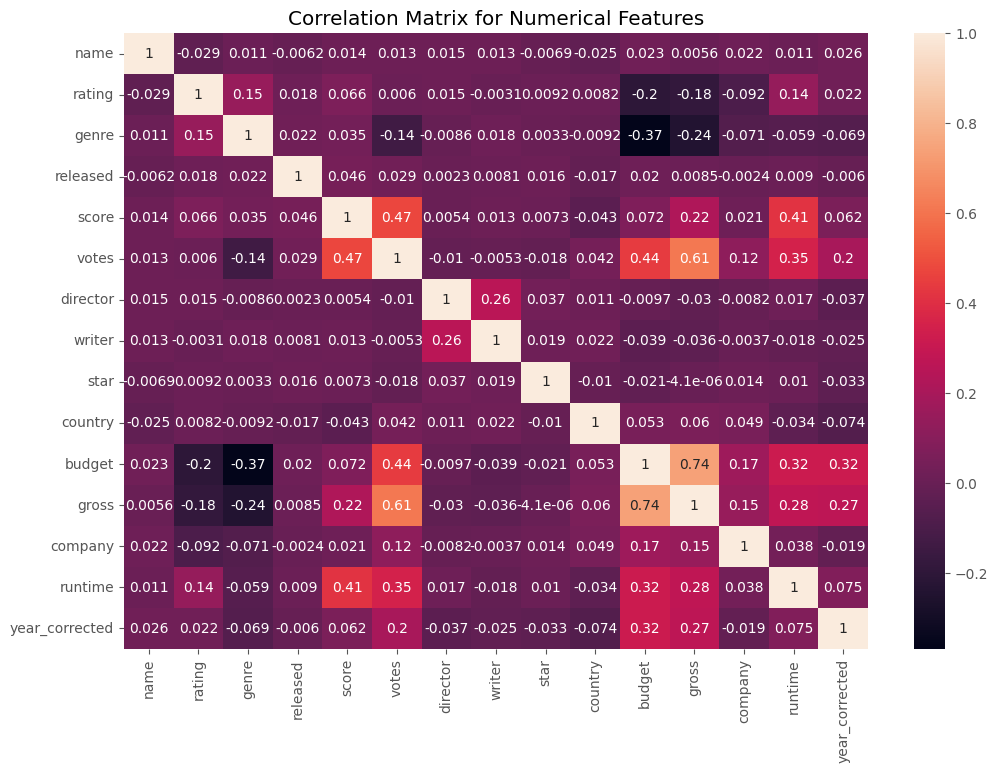

In [18]:
corr_matrix=df_numerized.corr(numeric_only = True, method="pearson")
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix for Numerical Features")

plt.show()

<h4>
    In conclusion, columns 'budget' and  'gross' seem to be the most correlated among numeric as well as non - numeric columns. This implies that gross revenue of the movie is proportional to the budget of the movie.
</h4>